In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()  # Select kaggle.json file from your local machine

Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"chandsafi","key":"31f88155edc3f8975c17a2286cbdd7d3"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 98% 118M/121M [00:06<00:00, 24.0MB/s]
100% 121M/121M [00:06<00:00, 20.2MB/s]


In [6]:
!unzip face-expression-recognition-dataset.zip -d /content/face-expression-recognition-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/8797.jpg  
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/8818.jpg  
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/886.jpg  
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/9037.jpg  
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/9040.jpg  
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/9101.jpg  
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/911.jpg  
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/9179.jpg  
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/9205.jpg  
  inflating: /content/face-expression-recognition-dataset/images/validation/fear/9232.jpg  
  inflating: /content/face-expr

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

# Change the import statement to use tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training and validation sets with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values
    shear_range=0.2,              # Random shear
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True,         # Flip images
    validation_split=0.2          # Reserve a portion for validation
)

# Training data generator
train_generator = datagen.flow_from_directory(
    '/content/face-expression-recognition-dataset/images/train',  # Path to your dataset
    target_size=(64, 64),          # Resize images to 64x64
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    '/content/face-expression-recognition-dataset/images/validation',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 23060 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a simple CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 classes for 7 expressions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=40)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


721/721 ━━━━━━━━━━━━━━━━━━━━ 55s 68ms/step - accuracy: 0.2771 - loss: 1.7618 - val_accuracy: 0.4139 - val_loss: 1.5545
Epoch 2/40
721/721 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.4124 - loss: 1.5254 - val_accuracy: 0.4245 - val_loss: 1.4934
Epoch 3/40
721/721 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.4450 - loss: 1.4314 - val_accuracy: 0.4387 - val_loss: 1.4405
Epoch 4/40
721/721 ━━━━━━━━━━━━━━━━━━━━ 79s 60ms/step - accuracy: 0.4748 - loss: 1.3716 - val_accuracy: 0.4380 - val_loss: 1.4184
Epoch 5/40
721/721 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.4914 - loss: 1.3243 - val_accuracy: 0.4465 - val_loss: 1.4082
Epoch 6/40
721/721 ━━━━━━━━━━━━━━━━━━━━ 52s 72ms/step - accuracy: 0.5061 - loss: 1.2929 - val_accuracy: 0.4770 - val_loss: 1.3747
Epoch 7/40
721/721 ━━━━━━━━━━━━━━━━━━━━ 81s 70ms/step - accuracy: 0.5203 - loss: 1.2472 - val_accuracy: 0.4812 - val_loss: 1.3518
Epoch 8/40
721/721 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.5299 - loss: 1.2325 - val_accurac

In [9]:
# Step 6: Evaluate the Model (Optional)
model.evaluate(validation_generator)

# Step 7: Save the Model (Optional)
model.save('expression_classification_model.h5')

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5300 - loss: 1.5125


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step


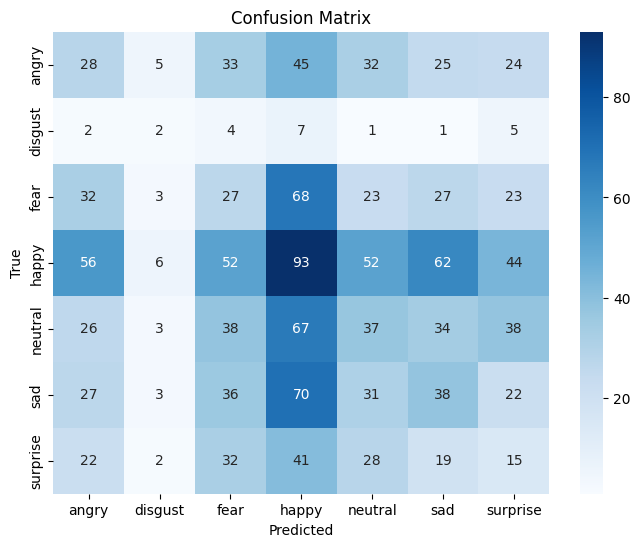

Classification Report:
              precision    recall  f1-score   support

       angry       0.15      0.15      0.15       192
     disgust       0.08      0.09      0.09        22
        fear       0.12      0.13      0.13       203
       happy       0.24      0.25      0.25       365
     neutral       0.18      0.15      0.17       243
         sad       0.18      0.17      0.18       227
    surprise       0.09      0.09      0.09       159

    accuracy                           0.17      1411
   macro avg       0.15      0.15      0.15      1411
weighted avg       0.17      0.17      0.17      1411



In [11]:
# Step 8: Confusion Matrix and Classification Report
# Import confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Get the true labels and predicted labels for the validation set
validation_generator.reset()
Y_pred = model.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print('Classification Report:')
target_names = list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

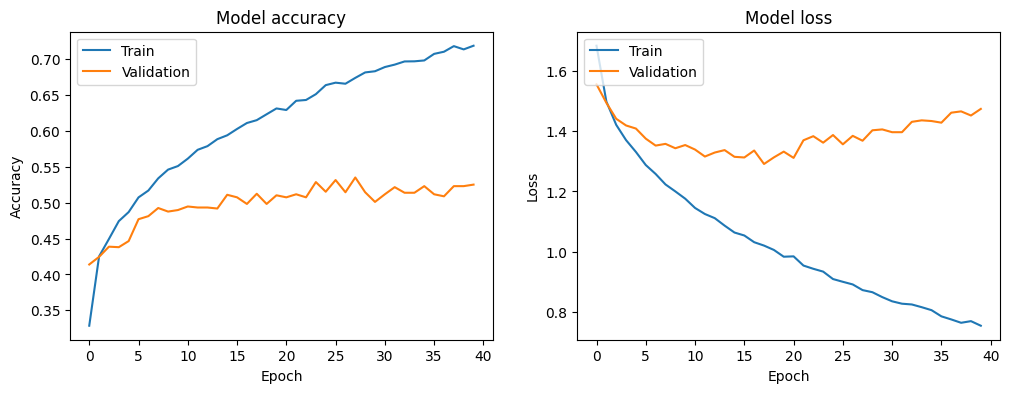

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

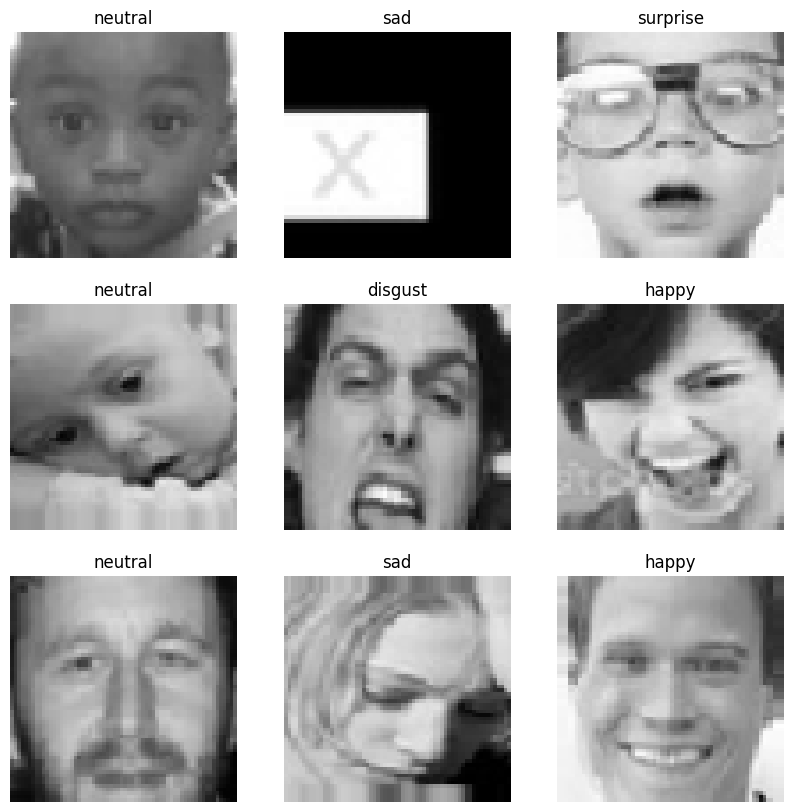

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images
def show_images(generator, categories, num_images=9):
    # Get a batch of images and labels
    images, labels = next(generator)

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        label_index = np.argmax(labels[i])
        plt.title(categories[label_index])
        plt.axis("off")
    plt.show()

# Assuming 'train_generator' is your data generator and it has a 'class_indices' attribute
categories = list(train_generator.class_indices.keys())
show_images(train_generator, categories)